In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the provided csv file into the python dataframe 
myData = pd.read_csv("iris.csv")

In [3]:
#Function to calculate and return the Pairwise Pearson correlation coefficients
def compute_pairwise_pearson_correlation_coefficients(x,y):
    coefficients = x.corr(y, method='pearson')
    return coefficients

In [4]:
#Function to plot the graph to visualize the correlation between two variables
def graph_to_visualize_correlation(x,y):
    plt.scatter(x, y, label='Correlation = {}'.format(x.corr(y))) 
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    plt.title('Graph to visualize the Correlation between two variables')
    plt.legend()
    plt.show()

In [5]:
#Function to visualize the correlation matrix
def visualize_correlation_matrix(x,y):
    var1Array = np.array(x)
    var2Array = np.array(y)
    correlationMatrix = np.corrcoef(var1Array,var2Array)
    correlationMatrix = pd.DataFrame(data=correlationMatrix,columns=[x.name,y.name])
    correlationMatrix.columns =[x.name,y.name]
    print('The Correlation Matrix is: \n{}'.format(correlationMatrix))
    sns.heatmap(correlationMatrix, annot = True)
    plt.show()

In [6]:
#Function to perform z-score standardization on the data
def compute_z_score(data):
    zdata = data.select_dtypes(float)
    zdataScore = (zdata-zdata.mean())/(zdata.std())
    zdataResult = pd.DataFrame(zdataScore,index=zdata.index,columns=zdata.columns)
    return zdataResult

In [7]:
#Function to compute covariance matrix for the standardized data
def compute_covarinace_matrix(standardizeData):
    covarianceMatrix = np.cov(standardizeData,rowvar = False)
    return covarianceMatrix

In [8]:
#Function to compute eigenvalues and eigenvectors for the covariance matrix
def compute_eigen_values_vectors(covarianceMatrix):
    eigen_values, eigen_vectors = np.linalg.eig(covarianceMatrix)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigen_value = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    return {"eigen_values":eigen_values,"eigen_vectors":eigen_vectors}

The Pearson correlation coefficients, between the variable is:  -0.11756978413300208


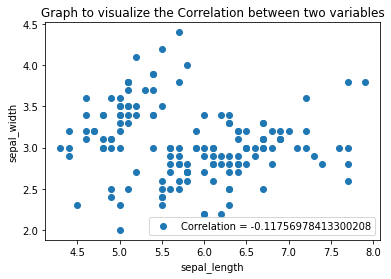

The Correlation Matrix is: 
   sepal_length  sepal_width
0       1.00000     -0.11757
1      -0.11757      1.00000


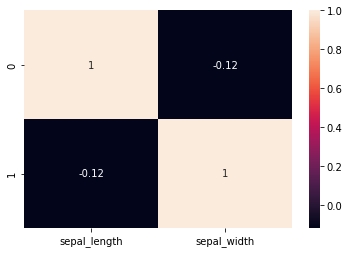

The z-score standardization on the data: 
       sepal_length  sepal_width  petal_length  petal_width
0       -0.897674     1.015602     -1.335752    -1.311052
1       -1.139200    -0.131539     -1.335752    -1.311052
2       -1.380727     0.327318     -1.392399    -1.311052
3       -1.501490     0.097889     -1.279104    -1.311052
4       -1.018437     1.245030     -1.335752    -1.311052
..            ...          ...           ...          ...
145      1.034539    -0.131539      0.816859     1.443994
146      0.551486    -1.278680      0.703564     0.919223
147      0.793012    -0.131539      0.816859     1.050416
148      0.430722     0.786174      0.930154     1.443994
149      0.068433    -0.131539      0.760211     0.788031

[150 rows x 4 columns]
The covarinace matrix for the standardized data: 
 [[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.962

In [9]:
pearsonCoefficients = compute_pairwise_pearson_correlation_coefficients(myData['sepal_length'],myData['sepal_width'])
print("The Pearson correlation coefficients, between the variable is: ",pearsonCoefficients)
correlationGraph = graph_to_visualize_correlation(myData['sepal_length'],myData['sepal_width'])
correlationMatrix = visualize_correlation_matrix(myData['sepal_length'],myData['sepal_width'])
zscoreStandardization = compute_z_score(myData)
print("The z-score standardization on the data: \n ",zscoreStandardization)
covarianceMatrix = compute_covarinace_matrix(zscoreStandardization)
print("The covarinace matrix for the standardized data: \n",covarianceMatrix)
eigen_values_vector = compute_eigen_values_vectors(covarianceMatrix)
print("The eigenvalues for the covariance matrix: \n",eigen_values_vector['eigen_values'])
print("The eigenvectors for the covariance matrix: \n",eigen_values_vector['eigen_vectors'])